# ML algorithms - Performance evaluation

## Learning objectives
* understanding the metrics used for regression problems and for classification problems

## Ker terms:
* prediction error 
* accuracy
* precision
* recall
* confusion matrix

# Requirements 
* compute the prediction performance in the case of a regression problem
* compute the prediction performance in the case of a binary classification problem (balanced dataset and unbalanced dataset)
* compute the prediction performance in the case of a binary classification problem (when the computed outputs are represented as probabilities - a $noSamples \times noClasses$ values)

## Regression problems
In a regression problem, the outputs of a prediction algorithm are represented by real values. 
For instance, we want to estimate the icecream consumption (in a camp) according to the temperature and the number of children in a camp.

Suppose that an ML algorithm has provided, for a set of camps (known as set of inputs or set of samples), a set of icecream consumption (known as set of outputs) $computedOutputs$. The real icecream consumption are also known ($realOutputs$). Determine the algorithm's performance.

A possible performance measure is given by the prediction error expressed as sum of the distances between the real outputs and the predicted outputs. The distance, for each sample, can be measured as:
* the absolute difference  (this is $L_1$ distance):
$$Error = \sum_{i=1}^{noSamples} |realOutputs_i - computedOutputs_i|$$
* the square difference (this is the $L_2$ distance):
$$Error = \sum_{i=1}^{noSamples} (realOutputs_i- computedOutputs_i) ^ 2$$ 


In [ ]:
# consider some real values and some predicted values (obtained by the ML algorithm)

realOutputs = [3, 9.5, 4, 5.1, 6, 7.2, 2, 1]
computedOutputs = [2, 7, 4.5, 6, 3, 8, 3, 1.2]

# plot the data
import matplotlib.pyplot as plt

indexes = [i for i in range(len(realOutputs))]
real, = plt.plot(indexes, realOutputs, 'ro', label = 'real')
computed, = plt.plot(indexes, computedOutputs, 'bo', label = 'computed')
plt.xlim(0,8)
plt.ylim(0, 10)
plt.legend([real, (real, computed)], ["Real", "Computed"])
plt.show()


In [ ]:
# compute the prediction error
from math import sqrt

errorL1 = sum(abs(r - c) for r, c in zip(realOutputs, computedOutputs))
print('Error (L1): ', errorL1)

errorL2 = sqrt(sum((r - c) ** 2 for r, c in zip(realOutputs, computedOutputs)))
print('Error (L2): ', errorL2)

## Classification problems
If we deal by a binary classification problem, the outputs represent some labels. There are possible two labels, only (one for each class or output type). Suppose that class 1 is the positive class, while class 2 is the negative class. For instance, if we want to classify the emails into spam or ham messages, *spam* and *ham* are the two classes.

An ML algorithm has provided, for a set of emails (known as set of inputs or set of samples), a set of spam/ham labels (known as set of outputs) $computedOutputs$. The real labels are also known $realOutputs$. Determine the algorithm's performance. 

Three performance measures are usefull for a classification problem: accuracy, precision, recall. Some pre-computations, enclosed in the confusion matrix are useful: 
* true positive 
* false positive
* true negative
* false negative

The confusion matrix has the form: <img src="images/cm.png" width="200">
* accuracy represents the overall performance of classification model: 
$$acc = \frac{TP + TN}{TP + TN + FP + FN} = \frac{correc predicted}{no of all samples}$$
* precision indicates how accurate the positive predictions are: 
$$precision = \frac{TP}{TP+FP}$$
* recall indicates the coverage of actual positive sample: 
$$recall = \frac{TP}{TP+FN}$$

In [2]:
# a balanced data set (each class containes the same numer of samples)

realLabels =        ['spam', 'spam', 'ham', 'ham', 'spam', 'ham']
computedLabels =    ['spam', 'ham', 'ham', 'spam', 'spam', 'ham']



# suppose that 'spam' is the positive class (and 'ham' is the negative class)
# compute the prediction performance

# version 1 - using the sklearn functions
def evalClassificationV1(realLabels, computedLabels, labelNames):
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

    cm = confusion_matrix(realLabels, computedLabels, labels = labelNames)
    acc = accuracy_score(realLabels, computedLabels)
    precision = precision_score(realLabels, computedLabels, average = None, labels = labelNames)
    recall = recall_score(realLabels, computedLabels, average = None, labels = labelNames)
    return acc, precision, recall 

# version 2 - native code
def evalClassificationV2(realLabels, computedLabels, pos, neg):
    # noCorrect = 0
    # for i in range(0, len(realLabels)):
    #     if (realLabels[i] == computedLabels[i]):
    #         noCorrect += 1
    # acc = noCorrect / len(realLabels)
    acc = sum([1 if realLabels[i] == computedLabels[i] else 0 for i in range(0, len(realLabels))]) / len(realLabels)

    # TP = 0
    # for i in range(0, len(realLabels)):
    #     if (realLabels[i] == 'spam' and computedLabels[i] == 'spam'):
    #         TP += 1
    TP = sum([1 if (realLabels[i] == pos and computedLabels[i] == pos) else 0 for i in range(len(realLabels))])
    FP = sum([1 if (realLabels[i] == neg and computedLabels[i] == pos) else 0  for i in range(len(realLabels))])
    TN = sum([1 if (realLabels[i] == neg and computedLabels[i] == neg) else 0 for i in range(len(realLabels))])
    FN = sum([1 if (realLabels[i] == pos and computedLabels[i] == neg) else 0  for i in range(len(realLabels))])

    precisionPos = TP / (TP + FP)
    recallPos = TP / (TP + FN)
    precisionNeg = TN / (TN + FN)
    recallNeg = TN / (TN + FP)

    return acc, precisionPos, precisionNeg, recallPos, recallNeg
    
# acc, prec, recall = evalClassificationV1(realLabels, computedLabels, ['spam', 'ham'])

# # acc, prec, recall = evalClassificationV2(realLabels, computedLabels, 'spam', 'ham')

# print('acc: ', acc, ' precision: ', prec, ' recall: ', recall)


realLabels =        ['spam', 'spam', 'spam', 'spam', 'spam', 'spam']
computedLabels =    ['spam', 'ham', 'ham', 'spam', 'spam', 'new']



acc, prec, recall = evalClassificationV1(realLabels, computedLabels, ['spam', 'ham', 'new'])

# acc, prec, recall = evalClassificationV2(realLabels, computedLabels, 'spam', 'ham')

print('acc: ', acc, ' precision: ', prec, ' recall: ', recall)

acc:  0.5  precision:  [1. 0. 0.]  recall:  [0.5 0.  0. ]


In [ ]:
# an unbalanced data set (the numer of samples from each class are not uniform distributed)

realLabels =        ['infected', 'infected', 'infected', 'infected', 'normal', 'normal', 'normal', 'normal', 'normal','normal', 'normal', 'normal', 'normal', 'normal', 'normal']
computedLabels =    ['infected', 'infected', 'normal', 'normal', 'normal', 'normal','normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'infected']

acc, prec, recall = evalClassificationV1(realLabels, computedLabels, ['infected', 'normal'])
# acc, prec, recall = evalClassificationV2(realLabels, computedLabels, 'infected', 'normal')

print('acc: ', acc, ' precision: ', prec, ' recall: ', recall)


# Classification and probabilities

What happens if the classification algorithm's **outputs represents probabilities**

In this case, for each sample, $noClasses$ probabilities are computed (such as the summ of probabilities for a sample is 1). Remember that in the case of a binary classification problems ($noClasses$ = 2)

$computedOutputs = [(p_{11}, p_{12}), (p_{21}, p_{22}), ..., (p_{n1}, p_{n2})]$

where $p_{ij}$ is the probability that the sample $i$ belongs to class $j$ and $n$ is the number of samples

The corresponding label is indicated by the largest probability

$computedLabels = [argmax(p_{1j}), argmax(p_{2j}), ..., argmax(p_{nj}),$ where $j \in \{1, 2, .., noClasses\}$


In [ ]:
# if the rawOutputs of the ML algorithms are probabilities (not labels)
realLabels =        ['spam', 'spam', 'ham', 'ham', 'spam', 'ham']
computedOutputs = [ [0.7, 0.3], [0.2, 0.8], [0.4, 0.6], [0.9, 0.1], [0.7, 0.3], [0.4, 0.6]]
# computedLabels have to be  ['spam', 'ham', 'ham', 'spam', 'spam', 'ham']

# transform the raw outputs into labels

# version 1 - native code
# computedLabels = []
# labelNames = list(set(realLabels))
# for p in computedOutputs:
#     probMaxPos = p.index(max(p))
#     label = labelNames[probMaxPos]
#     computedLabels.append(label)

# version 2 - by using NumPy library
import numpy as np
labelNames = list(set(realLabels))
computedLabels = [labelNames[np.argmax(p)] for p in computedOutputs]

# compute the performance
acc, prec, recall = evalClassificationV1(realLabels, computedLabels, ['spam', 'ham'])

print('acc: ', acc, ' precision: ', prec, ' recall: ', recall)


# Homework
* compute the error in the case of a multi-target regression problem
* compute the accuracy, precision, recall for a multi-class classification problem (computedOutputs are predicted labels)

# Optional Homework
* compute the loss in the case of a binary-classification problem (computed outputs are class probabilities - a matrix of $noSamples \times noClasses$ real values, each line having sum 1)
* compute the loss in the case of a multi-class classification problem (computed outputs are $noClasses$ real values)
* compute the loss in the case of a multi-label classification problem (computed outputs are $noClasses$ real values)

In [ ]:
# regression multi-target ($(y_1, y_2, ..., y_o) = f(x_1, x_2, ..., x_m$)

realOutputs = [[3, 9], [4, 5], [6, 7], [2, 1]]
computedOutputs = [[2, 7], [4.5, 6], [3, 8], [3, 1.2]]

# diff = []
# for realOut, computedOut in zip(realOutputs, computedOutputs):
#     diff.append([(r - c) ** 2 for r, c in zip(realOut, computedOut)])
# for i in range(len(diff)):
#     diff[i] = sum(diff[i])
# errorL2 = sqrt(sum(diff))

erorL2 = sqrt(sum([sum([(r - c) ** 2 for r, c in zip(realOut, computedOut)]) for realOut, computedOut in zip(realOutputs, computedOutputs)]))

print('Error (L2): ', errorL2)




In [ ]:
realLabels =        ['infected', 'infected', 'infected', 'infected', 'normal', 'normal', 'normal', 'normal', 'normal','normal', 'normal', 'normal', 'dead', 'dead', 'dead']
computedLabels =    ['infected', 'infected', 'dead', 'normal', 'normal', 'normal','normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'dead', 'infected']

def evalMultiClassV1(realLabels, computedLabels, labelNames):
    acc = sum([1 if realLabels[i] == computedLabels[i] else 0 for i in range(0, len(realLabels))]) / len(realLabels)
    TP = {} 
    FP = {}
    TN = {}
    FN = {}
    for label in labelNames:
        TP[label] = sum([1 if (realLabels[i] == label and computedLabels[i] == label) else 0 for i in range(len(realLabels))])
        FP[label] = sum([1 if (realLabels[i] != label and computedLabels[i] == label) else 0  for i in range(len(realLabels))])
        TN[label] = sum([1 if (realLabels[i] != label and computedLabels[i] != label) else 0 for i in range(len(realLabels))])
        FN[label] = sum([1 if (realLabels[i] == label and computedLabels[i] != label) else 0  for i in range(len(realLabels))])

    precision = {}
    recall = {}
    for label in labelNames:
        precision[label] = TP[label]/ (TP[label] + FP[label])
        recall[label] = TP[label] / (TP[label] + FN[label])
        
    return acc, precision, recall 

def evalMultiClassV2(realLabels, computedLabels, labelNames):
    confMatrix = [[0 for _ in labelNames] for _ in labelNames]
    for k in range(len(realLabels)):
        for i in range(len(labelNames)):
            for j in range(len(labelNames)):
                if (realLabels[k] == labelNames[i]) and (computedLabels[k] == labelNames[j]):
                    confMatrix[i][j] += 1
    acc = sum([confMatrix[i][i] for i in range(len(labelNames))]) / len(realLabels)
    precision = {}
    recall = {}
    for i in range(len(labelNames)):
        precision[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[j][i] for j in range(len(labelNames))])
        recall[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[i][j] for j in range(len(labelNames))])
    return acc, precision, recall 

acc, prec, recall = evalMultiClassV1(realLabels, computedLabels, list(set(realLabels)))

# acc, prec, recall = evalMultiClassV2(realLabels, computedLabels, list(set(realLabels)))

# use sklearn functions (evalClassificationV1 was already defined for binary classification problem, but it can be used for multi-class case, also)
# acc, prec, recall = evalClassificationV1(realLabels, computedLabels, list(set(realLabels)))

print('acc: ', acc, ' precision: ', prec, ' recall: ', recall)




Loss function - binary classification problems

Real (target) values: for each sample, $t = \[t_1, t_2, ..., t_C\]$ with $t_i \in \{0, 1\}$

Predicted scores: for each sample, there are $C$ values ($C$ = no of classes): $s = \[s_1, s_2, ..., s_C\]$

Cross-entropy loss (Logistic Loss or Multinomial Logistic Loss): $CE(crtSample) = = \sum_{i=1}^{C}t_i \log(s_i)$

Croo-entropyl loss for the entire dataset: $CE(dataset) = \sum_{sample \in dataset} CE(sample)$



In [ ]:
import math 


def evalLogLossV1(realLabels, computedOutputs):
    # suppose that 'spam' is the positive class
    realOutputs = [[1, 0] if label == 'spam' else [0, 1] for label in realLabels]
    datasetSize = len(realLabels)
    noClasses = len(set(realLabels))
    datasetCE = 0.0
    for i in range(datasetSize):
        sampleCE = - sum([realOutputs[i][j] * math.log(computedOutputs[i][j]) for j in range(noClasses)])
        datasetCE += sampleCE
    meanCE = datasetCE / datasetSize
    return meanCE

def evalLogLossV2(realLabels, computedOutputs):
    g = tf.Graph()
    session = tf.InteractiveSession(graph = g)
    
    realOutputsTF = tf.constant(realOutputs, dtype = tf.float32)
    computedOutputsTF = tf.constant(computedOutputs, dtype = tf.float32)
    ce = tf.losses.log_loss(realOutputsTF, computedOutputsTF)
    ceEval = session.run(ce)
    print(ceEval)

    session.close()

realLabels =        ['spam', 'spam', 'ham', 'ham', 'spam', 'ham']
# realLabels = [1, 1, 0, 0, 1, 0]
computedOutputs = [ [0.7, 0.3], [0.2, 0.8], [0.4, 0.6], [0.9, 0.1], [0.7, 0.3], [0.4, 0.6]]
# computedLabels =    [1, 0, 0, 1, 1, 0]


print('CE Loss: ', evalLogLossV1(realLabels, computedOutputs))
# print('CE loss:', evalLogLossV2(realLabels, computedOutputs))

Compute the loss associated to a particular output

Image classification: an ML algorithm has to classify a given image (in one of five classes) and it outputs the next raw values: $[-0.5, 1.2, -0.1, 2.4, 0.3]$. Discuss how to evaluate the quality of classifier. 


* Multi-class classification problem: Classify a MNIST image (it can contain a single odd digit). In this case, the classification algorithm has to provide five outputs, one for each possible class/label (one, three, five, seven, nine). Each image can belong to ONE of 5 classes. 
* multi-label classification problem: Classify a medical image that can contain signs of pneumonia, cardiomegaly, nodule, abscess or hernia. In this case, the classification algorithm has to provide four outputs, one for each possible class/label. Each image can belong to more than one classes.


In order to compute the probabilities associated to the five classes, the raw values must be mapped into values between 0 and 1 such as:
* the highest value to indicate the predicted class (outputs are mutual exclusives, because there is only one right answer - multi-class classification). 
* a higher value indicates a higher probability, but not the highest probability (outputs are not mutual exclusive, because there is more than one right answer - multi-label classification)

A sigmoid function maps a value to $[0,1]$ (the probabilities produced by a sigmoid are independent, and are not constrained to sum to one), but we have to impose that the sum of these $[0,1]$ values to be 1 (in order for the probability of one class to increase, the probabilities of at least one of the other classes has to decrease by an equivalent amount). The softmax can help in this case (the outputs of a softmax are all interrelated).

$sigmoid(val_i) = \frac{1}{1 + e^{-val_i}}$

$softmax(val_i) = \frac{val_i}{\sum_{j=1}^{noClasses}{e^{val_j}}}$


The cross-entropy loss formula is the same in both cases ($CE(crtSample) = = \sum_{i=1}^{C}t_i \log(s_i))$), but $s_i$ are the mapped values by:
* softmax function (for multi-class classification)
* sigmoid function (for multi-label classification)


Multi-class classification

Inputs:
* Real (target) values: for each sample, $t = [t_1, t_2, ..., t_C]$ with $t_i \in \{0, 1\}$ and $\sum_{i=1}^{C} t_i = 1$
* Predicted scores: for each sample, there are $C$ values ($C$ = no of classes): $s = [s_1, s_2, ..., s_C]$, $s_i \in \Re$

Output:
* CE loss (softmax CE loss)

In [ ]:
def evalSoftmaxCEsample(targetValues, rawOutputs):
    # apply softmax for all raw outputs
    noClasses = len(targetValues)
    expValues =[math.exp(val) for val in rawOutputs]
    sumExpVal = sum(expValues)
    mapOutputs = [val / sumExpVal for val in expValues]
    print(mapOutputs, ' sum: ', sum(mapOutputs))
    sampleCE = - sum([targetValues[j] * math.log(mapOutputs[j]) for j in range(noClasses)])
    return sampleCE

print(evalSoftmaxCEsample([0, 1, 0, 0, 0], [-0.5, 1.2, 0.1, 2.4, 0.3]))

Multi-label classification

Inputs:
* Real (target) values: for each sample, $t = [t_1, t_2, ..., t_C]$ with $t_i \in \{0, 1\}$
* Predicted scores: for each sample, there are $C$ values ($C$ = no of classes): $s = [s_1, s_2, ..., s_C]$, $s_i \in \Re$

Output:
* CE loss (sigmoid CE loss)

In [ ]:
def evalSigmoidCEsample(targetValues, rawOutputs):
    # apply softmax for all raw outputs
    noClasses = len(targetValues)
    mapOutputs = [1 / (1 + math.exp(-val)) for val in rawOutputs]
    print(mapOutputs, ' sum: ', sum(mapOutputs))
    sampleCE = - sum([targetValues[j] * math.log(mapOutputs[j]) for j in range(noClasses)])
    return sampleCE

print(evalSigmoidCEsample([0, 1, 0, 0, 1], [-0.5, 1.2, 0.1, 2.4, 0.3]))

In [42]:

import pandas as pd
import os
import numpy as np 
from datetime import date, timedelta
import matplotlib.pyplot as plt 

crtDir =  os.getcwd()
# filePath = os.path.join(crtDir, 'lab06_evalML', 'data', 'covid19_italy_province.csv')
filePathPatients = os.path.join(crtDir, 'lab06_evalML', 'data', 'patient.csv')
filePathRoutes = os.path.join(crtDir, 'lab06_evalML', 'data', 'route.csv')
filePathTimes = os.path.join(crtDir, 'lab06_evalML', 'data', 'time.csv')

df_patient = pd.read_csv(filePathPatients)
df_route = pd.read_csv(filePathRoutes)
df_time = pd.read_csv(filePathTimes)


df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val: val if val > 0 else np.nan)
df_patient.confirmed_date = pd.to_datetime(df_patient.confirmed_date)

daily_count = df_patient.groupby(df_patient.confirmed_date).patient_id.count()
accumulated_count = daily_count.cumsum()

df_patient['age'] = 2020 - df_patient['birth_year'] 
import math
def group_age(age):
    if age >= 0: # not NaN
        if age % 10 != 0:
            lower = int(math.floor(age / 10.0)) * 10
            upper = int(math.ceil(age / 10.0)) * 10 - 1
            return f"{lower}-{upper}"
        else:
            lower = int(age)
            upper = int(age + 9) 
            return f"{lower}-{upper}"
    return "Unknown"


df_patient["age_range"] = df_patient["age"].apply(group_age)






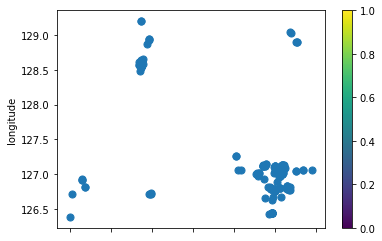

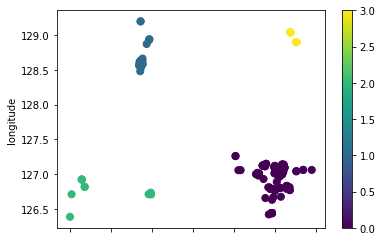

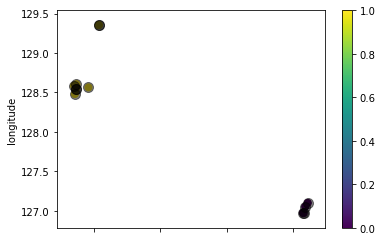

In [40]:
# clustering

clus=df_route.reindex(columns = ['id','latitude','longitude'])

clusTrain = clus.reindex(range(0, 200))
clusTest = clus.reindex(range(200,212))

clusTrain.plot.scatter(x = 'latitude', y = 'longitude', s=50, cmap='viridis')


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(clusTrain[clusTrain.columns[1:3]])
clusTrain['cluster_label'] = kmeans.fit_predict(clusTrain[clusTrain.columns[1:3]])

labels = kmeans.predict(clusTrain[clusTrain.columns[1:3]])
clusTrain.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')

testLabels = kmeans.predict(clusTest[clusTest.columns[1:3]])
clusTest.plot.scatter(x = 'latitude', y = 'longitude', c=testLabels, s=50, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.scatter(clusTest.reindex(columns = ['latitude']), clusTest.reindex(columns = ['longitude']), c = 'black', s= 100, alpha = 0.5)


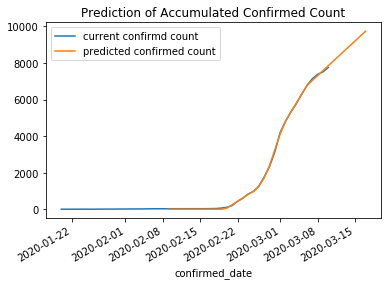

In [41]:
# regression
data = daily_count.resample('D').first().fillna(0).cumsum()
data = data[20:]
x = np.arange(len(data)).reshape(-1, 1)
y = data.values

from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
_=model.fit(x, y)
test = np.arange(len(data)+7).reshape(-1, 1)
pred = model.predict(test)
prediction = pred.round().astype(int)
week = [data.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction, dt_idx)

# plot the results
accumulated_count.plot()
predicted_count.plot()
plt.title('Prediction of Accumulated Confirmed Count')
plt.legend(['current confirmd count', 'predicted confirmed count'])
plt.show()




## Regression problems
In a regression problem, the outputs of a prediction algorithm are represented by real values. 
For instance, we want to estimate the number of infected persons (in a country) along a given time period. 
We know some past data (from every week of the last two month), $realNoInfections$ and we want to fit a model on this data by using a magic algorithm (in fact an ML algorithm) that will output / predict the number of infected persons in the near future (the next month). In order to evaluate the quality of the model, we compare its outputs (for the last two months), $predictedNoInfections$, to the $realNoInfections$. 

A possible performance measure is given by the prediction error expressed as sum of the distances between the real outputs and the predicted outputs. The distance, for each sample, can be measured as:
* the absolute difference  (this is $L_1$ distance):
$$Error = \frac{1}{noSamples} \times \sum_{i=1}^{noSamples} |realNoInfections_i - computedNoInfections_i| = Mean Absolute Error (MAE)$$
* the square difference (this is the $L_2$ distance):
$$Error = \sqrt{\frac{1}{noSamples} \times \sum_{i=1}^{noSamples} (realNoInfections_i - computedNoInfections_i) ^ 2} = Root Mean Square Error (RMSE)$$ 



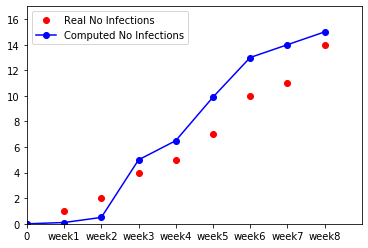

Error (L1):  1.6444444444444446
Error (L1):  1.9356308187943967


In [31]:
# consider some real values and some predicted values (obtained by the ML algorithm)
# we want ot estimate the error of prediction
# Problem specification:
# input: realOutputs, computedOutputs - arrays of the same length containing real numbers
# output: error - real value

realNoInfections =     [0, 1.0, 2.0, 4.0, 5.0, 7.0, 10.0, 11.0, 14.0]
computedNoInfections = [0, 0.1, 0.5, 5.0, 6.5, 9.9, 13.0, 14.0, 15.0]

# plot the data
import matplotlib.pyplot as plt

indexes = [0] + ['week' + str(i) for i in range(1, len(realNoInfections))] 
real, = plt.plot(indexes, realNoInfections, 'ro', label = 'real')
computed, = plt.plot(indexes, computedNoInfections, 'bo-', label = 'computed')
plt.xlim(0, 9)
plt.ylim(0, 17)
plt.legend([real, computed], ["Real No Infections", "Computed No Infections"])
plt.show()

# compute the error
from math import sqrt

errorL1 = sum(abs(r - c) for r, c in zip(realNoInfections, computedNoInfections)) / len(realNoInfections)
print('Error (L1): ', errorL1)
errorL2 = (sum((r - c) ** 2 for r, c in zip(realNoInfections, computedNoInfections)) / len(realNoInfections)) ** 0.5
print('Error (L2): ', errorL2)

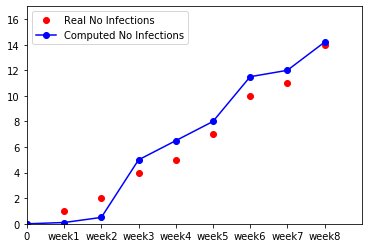

Error (L1):  0.9555555555555555
Error (L1):  1.0852547064066471


In [32]:
realNoInfections =     [0, 1.0, 2.0, 4.0, 5.0, 7.0, 10.0, 11.0, 14.0]
computedNoInfections = [0, 0.1, 0.5, 5.0, 6.5, 8.0, 11.5, 12.0, 14.2]

# plot the data
import matplotlib.pyplot as plt

indexes = [0] + ['week' + str(i) for i in range(1, len(realNoInfections))] 
real, = plt.plot(indexes, realNoInfections, 'ro', label = 'real')
computed, = plt.plot(indexes, computedNoInfections, 'bo-', label = 'computed')
plt.xlim(0, 9)
plt.ylim(0, 17)
plt.legend([real, computed], ["Real No Infections", "Computed No Infections"])
plt.show()

# compute the error
from math import sqrt

errorL1 = sum(abs(r - c) for r, c in zip(realNoInfections, computedNoInfections)) / len(realNoInfections)
print('Error (L1): ', errorL1)
errorL2 = (sum((r - c) ** 2 for r, c in zip(realNoInfections, computedNoInfections)) / len(realNoInfections)) ** 0.5
print('Error (L2): ', errorL2)